In [3]:
import pandas as pd

In [4]:
df=pd.read_csv(r"E:\MDTM40\Project_1_Agri\ICRISAT-District Level Data - ICRISAT-District Level Data.csv")
df.head()

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42


In [180]:
df.describe()

,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
count,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,...,16146.00000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000
mean,269.769231,1991.496841,9.568562,128.593192,224.889565,1486.924784,77.057946,182.012746,1492.419859,22.632268,...,4500.15306,28.018367,7.229225,124.644823,7.750478,11.086250,18.677877,3.177038,1.194604,21.550328
std,278.309125,15.011185,4.988538,160.078825,326.629828,956.185281,100.394479,348.834254,1081.255367,45.062714,...,3153.97042,74.239648,25.042132,207.681147,13.591135,18.003257,25.881842,8.029509,4.285067,60.062601
min,1.000000,1966.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,78.000000,1978.000000,6.000000,10.400000,9.460000,800.000000,1.770000,2.000000,750.000000,0.000000,...,2000.00000,0.000000,0.000000,0.000000,0.310000,1.600000,2.520000,0.000000,0.060000,0.000000
50%,156.000000,1991.000000,10.000000,66.800000,95.840000,1333.210000,36.800000,42.700000,1347.450000,2.050000,...,4502.21000,0.050000,0.000000,0.000000,2.220000,4.740000,8.945000,0.390000,0.280000,1.200000
75%,241.000000,2005.000000,12.000000,191.390000,315.715000,2113.517500,123.000000,215.192500,2131.580000,20.900000,...,6704.60500,10.097500,2.000000,202.270000,8.790000,12.510000,23.570000,3.150000,0.880000,16.762500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,334.800000,...,22062.30000,800.890000,376.610000,5000.000000,159.540000,200.060000,240.990000,111.610000,131.350000,1162.660000


In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [5]:
df.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [6]:
print((df.isnull().sum()/len(df))*100)

Dist Code                               0.0
Year                                    0.0
State Code                              0.0
State Name                              0.0
Dist Name                               0.0
                                       ... 
VEGETABLES AREA (1000 ha)               0.0
FRUITS AND VEGETABLES AREA (1000 ha)    0.0
POTATOES AREA (1000 ha)                 0.0
ONION AREA (1000 ha)                    0.0
FODDER AREA (1000 ha)                   0.0
Length: 80, dtype: float64


In [7]:
print(df.duplicated().sum())

0


In [8]:
df.nunique().sum()

np.int64(326527)

In [9]:
check_sum=(df['FRUITS AND VEGETABLES AREA (1000 ha)']==df['VEGETABLES AREA (1000 ha)']+df['FRUITS AREA (1000 ha)']).all()
print(check_sum)

False


In [5]:
df.columns=df.columns.str.strip().str.replace(" ","_")
df.columns

Index(['Dist_Code', 'Year', 'State_Code', 'State_Name', 'Dist_Name',
       'RICE_AREA_(1000_ha)', 'RICE_PRODUCTION_(1000_tons)',
       'RICE_YIELD_(Kg_per_ha)', 'WHEAT_AREA_(1000_ha)',
       'WHEAT_PRODUCTION_(1000_tons)', 'WHEAT_YIELD_(Kg_per_ha)',
       'KHARIF_SORGHUM_AREA_(1000_ha)',
       'KHARIF_SORGHUM_PRODUCTION_(1000_tons)',
       'KHARIF_SORGHUM_YIELD_(Kg_per_ha)', 'RABI_SORGHUM_AREA_(1000_ha)',
       'RABI_SORGHUM_PRODUCTION_(1000_tons)', 'RABI_SORGHUM_YIELD_(Kg_per_ha)',
       'SORGHUM_AREA_(1000_ha)', 'SORGHUM_PRODUCTION_(1000_tons)',
       'SORGHUM_YIELD_(Kg_per_ha)', 'PEARL_MILLET_AREA_(1000_ha)',
       'PEARL_MILLET_PRODUCTION_(1000_tons)', 'PEARL_MILLET_YIELD_(Kg_per_ha)',
       'MAIZE_AREA_(1000_ha)', 'MAIZE_PRODUCTION_(1000_tons)',
       'MAIZE_YIELD_(Kg_per_ha)', 'FINGER_MILLET_AREA_(1000_ha)',
       'FINGER_MILLET_PRODUCTION_(1000_tons)',
       'FINGER_MILLET_YIELD_(Kg_per_ha)', 'BARLEY_AREA_(1000_ha)',
       'BARLEY_PRODUCTION_(1000_tons)', 'BARLEY_

In [11]:
# CONNECTING WITH SQL

In [13]:
import mysql.connector

mydb = mysql.connector.connect(
 host="localhost",
 user="root",
 password="",
)

print(mydb)
mycursor = mydb.cursor(buffered=True)

In [ ]:
mycursor.execute("CREATE DATABASE PROJECT2")

In [ ]:
mycursor.execute("use PROJECT2")

In [ ]:
!pip install sqlalchemy

In [ ]:
from sqlalchemy import create_engine

In [ ]:
engine = create_engine(f'mysql+pymysql://root:@localhost:3306/project2')

In [ ]:
df.to_sql(name='icrisat_data', con=engine,schema='PROJECT2', if_exists='replace', index=False)

16146

In [ ]:
mydb.commit()

In [14]:
mycursor.execute("select * from project2.icrisat_data")

In [15]:
df.shape, df.size

((16146, 80), 1291680)

In [ ]:
# EDA

In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install plotly

In [ ]:
!pip install nbformat

In [51]:
import matplotlib.pyplot as plt

In [18]:
#1. Top 7 RICE PRODUCTION State Data(Bar_plot)
rice_state=(df.groupby(df['State_Name']).agg({'RICE_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='RICE_PRODUCTION_(1000_tons)',ascending=False)).iloc[:7,:]
rice_state

,RICE_PRODUCTION_(1000_tons)
State_Name,
West Bengal,544232.26
Uttar Pradesh,445597.62
Punjab,335040.10
Andhra Pradesh,315185.40
Tamil Nadu,291201.51
Orissa,282532.93
Bihar,231759.00


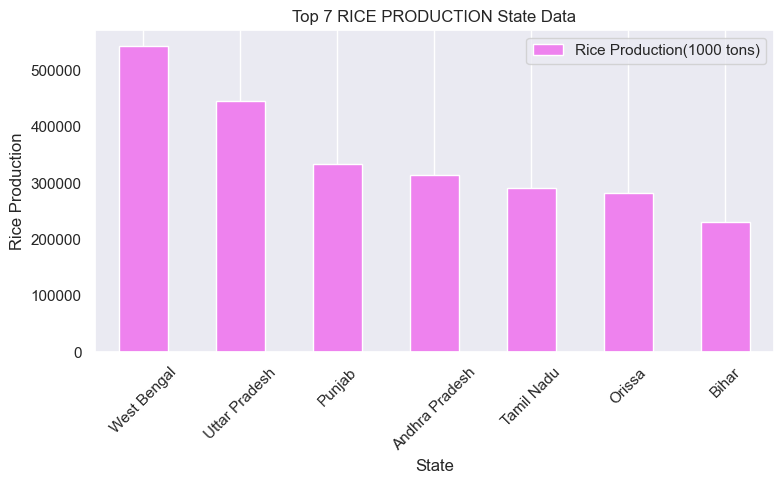

In [52]:
rice_state.plot(kind='bar',figsize=(8,5),color='violet')
plt.xlabel('State')
plt.ylabel('Rice Production')
plt.title('Top 7 RICE PRODUCTION State Data')
plt.legend(['Rice Production(1000 tons)'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [20]:
#2. Top 5 Wheat Producing States Data(Bar_chart)and its percentage(%)(Pie_chart)
wheat_state=df.groupby(df['State_Name']).agg({'WHEAT_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='WHEAT_PRODUCTION_(1000_tons)', ascending=False).iloc[:5,:]
wheat_state

,WHEAT_PRODUCTION_(1000_tons)
State_Name,
Uttar Pradesh,970210.07
Punjab,593848.90
Haryana,348429.60
Madhya Pradesh,338644.25
Rajasthan,265994.99


In [21]:
import seaborn as sns

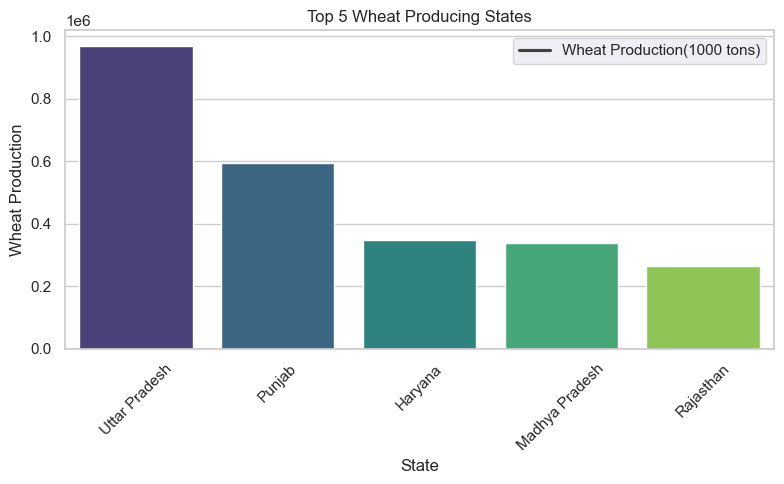

In [24]:
#2.Top 5 Wheat Producing States Data(Bar_chart)
plt.figure(figsize=(8,5))
sns.barplot(x="State_Name",y="WHEAT_PRODUCTION_(1000_tons)",hue='State_Name', palette=sns.color_palette("viridis", 5),data=wheat_state)
sns.set_theme(style="darkgrid")
plt.xlabel("State")
plt.ylabel("Wheat Production")
plt.title("Top 5 Wheat Producing States")
plt.legend(['Wheat Production(1000 tons)'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [25]:
wheat_state = wheat_state.reset_index()
wheat_state

,State_Name,WHEAT_PRODUCTION_(1000_tons)
0,Uttar Pradesh,970210.07
1,Punjab,593848.90
2,Haryana,348429.60
3,Madhya Pradesh,338644.25
4,Rajasthan,265994.99


In [45]:
#2. Top 5 Wheat Producing States Data and its percentage(%)(Pie_chart)
import plotly.express as px

fig = px.pie(names=wheat_state['State_Name'], values=wheat_state['WHEAT_PRODUCTION_(1000_tons)'],
             title='Top 5 Wheat Producing States')

fig.show()


In [27]:
#3. Oil seed production by top 5 states
oilseed_state=df.groupby(df['State_Name']).agg({'OILSEEDS_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='OILSEEDS_PRODUCTION_(1000_tons)',ascending=False).iloc[:5,:]
oilseed_state


,OILSEEDS_PRODUCTION_(1000_tons)
State_Name,
Madhya Pradesh,153594.79
Gujarat,126224.01
Rajasthan,122726.86
Maharashtra,95567.91
Andhra Pradesh,76888.09


In [28]:
oilseed_state = oilseed_state.reset_index()

In [65]:
#3. Oil seed production by top 5 states
import plotly.express as px

plt.figure(figsize=(8,5))
fig = px.bar(oilseed_state, x='State_Name', y='OILSEEDS_PRODUCTION_(1000_tons)',color='State_Name',text='OILSEEDS_PRODUCTION_(1000_tons)',
             title="Top 5 Oilseed Producing States")

fig.update_layout( xaxis_title='State', yaxis_title='Oilseed Production (1000 tons)', title_x=0.5, showlegend=False)
                  
fig.update_traces(textposition='outside') 
fig.show()

<Figure size 800x500 with 0 Axes>

In [60]:
#4. Top 7 SUNFLOWER PRODUCTION  State
sunflower_state=df.groupby(['State_Name']).agg({'SUNFLOWER_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='SUNFLOWER_PRODUCTION_(1000_tons)',ascending=False).iloc[:7,:]
sunflower_state=sunflower_state.reset_index()
sunflower_state

,State_Name,SUNFLOWER_PRODUCTION_(1000_tons)
0,Karnataka,10785.87
1,Maharashtra,5599.46
2,Andhra Pradesh,4447.78
3,Telangana,1401.06
4,Punjab,1081.86
5,Tamil Nadu,762.38
6,Uttar Pradesh,552.66


In [92]:
#4. Top 7 SUNFLOWER PRODUCTION  State
import plotly.express as px

fig = px.bar(sunflower_state, x='State_Name', y='SUNFLOWER_PRODUCTION_(1000_tons)',color='State_Name', title="Top 7 Sunflower Producing States", 
             text='SUNFLOWER_PRODUCTION_(1000_tons)')
fig.update_layout(showlegend=False, xaxis_title='State',yaxis_title='Sunflower Production', title_x=0.5, margin=dict(l=100, r=50, t=50, b=80))
fig.update_traces(textposition='outside')
fig.update_layout(
    updatemenus=[dict(type="buttons",direction="left",buttons=list([dict(args=["type", "scatter"],
                    label="Scatter Plot",method="restyle"), dict(args=["type", "bar"],
                    label="Bar Chart",method="restyle")]),),])

fig.show()

In [ ]:
#5. India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
sugarcane50=df.groupby(df['Year']).agg({'SUGARCANE_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='Year').tail(50)
sugarcane50=sugarcane50.reset_index()
sugarcane50

In [114]:
#5. India's SUGARCANE PRODUCTION From Last 50 Years(Line_plot)
fig = px.line(sugarcane50,x='Year',y='SUGARCANE_PRODUCTION_(1000_tons)',title="India's SUGARCANE PRODUCTION From Last 50 Years", markers=True)
fig.update_layout(xaxis_title='Year',yaxis_title='Sugarcane Production', title_x=0.5, margin=dict(l=100, r=50, t=50, b=80))
fig.update_layout(xaxis=dict(rangeselector=dict(buttons=list([dict(count=1,step="day",
                    stepmode="backward"),])),rangeslider=dict(visible=True),))
fig.show()

In [ ]:
#6. Rice Production Vs Wheat Production (Last 50y)
rice50=df.groupby(['Year']).agg({'RICE_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='Year', ascending=True).tail(50)
rice50=rice50.reset_index()

In [122]:
print(rice50)

    Year  RICE_PRODUCTION_(1000_tons)
0   1968                     34701.52
1   1969                     35836.01
2   1970                     39324.12
3   1971                     39946.79
4   1972                     37925.93
5   1973                     42026.94
6   1974                     37690.51
7   1975                     46144.36
8   1976                     40226.45
9   1977                     50439.41
10  1978                     50868.02
11  1979                     40560.64
12  1980                     52796.25
13  1981                     52486.37
14  1982                     45081.34
15  1983                     57766.50
16  1984                     56451.83
17  1985                     62289.85
18  1986                     58592.01
19  1987                     54890.34
20  1988                     68923.09
21  1989                     73530.86
22  1990                     71613.37
23  1991                     71858.31
24  1992                     70205.91
25  1993    

In [120]:
wheat50=df.groupby(['Year']).agg({'WHEAT_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='Year', ascending=True).tail(50)
wheat50=wheat50.reset_index()

In [130]:
rice50 = rice50.rename(columns={'RICE_PRODUCTION_(1000_tons)': 'Production',})
rice50['Crop'] = 'Rice'
wheat50 = wheat50.rename(columns={'WHEAT_PRODUCTION_(1000_tons)':'Production'})
wheat50['Crop'] = 'Wheat'


In [140]:
df_rw=pd.concat([rice50,wheat50])
df_rw

,Year,Production,Crop
0,1968,34701.52,Rice
1,1969,35836.01,Rice
2,1970,39324.12,Rice
3,1971,39946.79,Rice
4,1972,37925.93,Rice
...,...,...,...
45,2013,102506.18,Wheat
46,2014,84866.58,Wheat
47,2015,93824.98,Wheat
48,2016,112962.82,Wheat


In [144]:
#6. Rice Production Vs Wheat Production (Last 50y)
fig = px.line(df_rw,x='Year',y='Production',color='Crop',title="Rice Production Vs Wheat Production in Last 50 Years", markers=True)
fig.update_layout(title_x=0.5)
fig.show()

In [154]:
#7. Rice Production By West Bengal Districts
rice_wb=df[(df['State_Name']=='West Bengal')&(df['State_Code']==13)].groupby(['Dist_Name']).agg({'RICE_PRODUCTION_(1000_tons)':'sum'}).reset_index().sort_values(by='RICE_PRODUCTION_(1000_tons)',ascending=False)
rice_wb

,Dist_Name,RICE_PRODUCTION_(1000_tons)
10,Midnapur,98868.28
3,Burdwan,71422.15
0,24 Parganas,63011.99
2,Birbhum,42213.81
1,Bankura,40165.20
11,Murshidabad,37261.24
14,West Dinajpur,35224.87
6,Hooghly,30962.21
12,Nadia,28016.30
13,Purulia,23147.50


In [169]:
#7. Rice Production By West Bengal Districts
fig=px.scatter(rice_wb,x='Dist_Name',y='RICE_PRODUCTION_(1000_tons)',title="Rice Production in West Bengal Districts",color='Dist_Name')
fig.update_layout(title_x=0.5, xaxis_title='District Name',yaxis_title='Rice Production',showlegend=False)
fig.update_layout(updatemenus=[dict(buttons=list([dict(args=["type", "scatter"],
                    label="Scatter Plot",method="restyle"),
                dict(args=["type", "bar"],label="Bar Chart",method="restyle")]),direction="down",),])
fig.update_traces(textposition='top center')
fig.show()

In [202]:
#8. Top 10 Wheat Production Years From UP
wheat10=df[df['State_Name']=='Uttar Pradesh'].groupby(['Year']).agg({'WHEAT_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='WHEAT_PRODUCTION_(1000_tons)',ascending=False).iloc[:10,:]
wheat10=wheat10.reset_index()
wheat10

,Year,WHEAT_PRODUCTION_(1000_tons)
0,2017,35798.60
1,2016,35120.90
2,2011,32271.69
3,2013,31611.63
4,2010,30602.91
5,2008,29110.93
6,2012,29041.28
7,2009,27910.80
8,2015,27010.39
9,2003,26445.45


In [210]:
#8. Top 10 Wheat Production Years From UP
fig = px.bar(wheat10,x='Year',y='WHEAT_PRODUCTION_(1000_tons)',title="Wheat Production Years From UP",color="Year")
fig.update_layout(title_x=0.5, xaxis_title='Year',yaxis_title='Wheat Production')
fig.update_layout(updatemenus=[dict(buttons=list([dict(args=["type", "scatter"],
                    label="Scatter Plot",method="restyle"),
                dict(args=["type", "bar"],label="Bar Chart",method="restyle")]),direction="down",),])
fig.update_traces(textposition='auto')
fig.show()

In [ ]:
#9. Millet Production (Last 50y)
millet50=df.groupby(df['Year']).agg({'PEARL_MILLET_PRODUCTION_(1000_tons)':'sum','FINGER_MILLET_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='Year').tail(50)
millet50=millet50.reset_index()
millet50

In [247]:
##9. Millet Production (Last 50y)
fig = px.line(millet50,x='Year',y=['PEARL_MILLET_PRODUCTION_(1000_tons)','FINGER_MILLET_PRODUCTION_(1000_tons)'],title="Millet Production in Last 50 Years", markers=True)
fig.update_layout(title_x=0.5, yaxis_title="Millet Production")
fig.update_layout(xaxis=dict(rangeselector=dict(buttons=list([dict(count=1,step="day",
                    stepmode="todate"),])),rangeslider=dict(visible=True),))
fig.show()

In [28]:
#10. Sorghum Production (Kharif and Rabi) by Region
sorghum_r=df.groupby(['State_Name','Dist_Name']).agg({'KHARIF_SORGHUM_PRODUCTION_(1000_tons)':'sum','RABI_SORGHUM_PRODUCTION_(1000_tons)':'sum'})
sorghum_r=sorghum_r.reset_index()
sorghum_r

,State_Name,Dist_Name,KHARIF_SORGHUM_PRODUCTION_(1000_tons),RABI_SORGHUM_PRODUCTION_(1000_tons)
0,Andhra Pradesh,Ananthapur,1123.55,1036.57
1,Andhra Pradesh,Chittoor,290.32,28.11
2,Andhra Pradesh,East Godavari,68.53,60.27
3,Andhra Pradesh,Guntur,651.09,1960.84
4,Andhra Pradesh,Kadapa YSR,1511.60,342.36
...,...,...,...,...
306,West Bengal,Midnapur,0.22,0.00
307,West Bengal,Murshidabad,5.48,0.00
308,West Bengal,Nadia,0.06,0.00
309,West Bengal,Purulia,0.61,0.00


In [30]:
#10. Sorghum Production (Kharif and Rabi) by Region
fig=px.bar(sorghum_r,x='State_Name',y=['KHARIF_SORGHUM_PRODUCTION_(1000_tons)','RABI_SORGHUM_PRODUCTION_(1000_tons)'])
fig.update_layout(title_x=0.5, yaxis_title="Sorghum Production",barmode='group')
fig.show()

In [259]:
#11. Top 7 States for Groundnut Production
gn_state=df.groupby(['State_Name']).agg({'GROUNDNUT_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='GROUNDNUT_PRODUCTION_(1000_tons)',ascending=False).iloc[:7,:]
gn_state=gn_state.reset_index()
gn_state

,State_Name,GROUNDNUT_PRODUCTION_(1000_tons)
0,Gujarat,98321.42
1,Andhra Pradesh,57844.81
2,Tamil Nadu,57662.42
3,Karnataka,36033.05
4,Maharashtra,29002.06
5,Rajasthan,17354.29
6,Orissa,16857.48


In [ ]:
#11. Top 7 States for Groundnut Production
fig=px.bar(gn_state,x='State_Name',y='GROUNDNUT_PRODUCTION_(1000_tons)',color='State_Name', title='Top States for Groundnut Production', color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(title_x=0.5, yaxis_title="Groundnut Production")
fig.update_layout( xaxis_title='State', yaxis_title='Groundnut Production', title_x=0.5, showlegend=False)
                  
fig.update_traces(textposition='outside') 
fig.show()

In [20]:
#12. Soybean Production by Top 5 States and Yield Efficiency
soybean_state=df.groupby(['State_Name']).agg({'SOYABEAN_PRODUCTION_(1000_tons)':'sum', 'SOYABEAN_YIELD_(Kg_per_ha)':'sum'}).sort_values(by=['SOYABEAN_PRODUCTION_(1000_tons)','SOYABEAN_YIELD_(Kg_per_ha)'],ascending=False).head(5)
soybean_state=soybean_state.reset_index()
soybean_state

,State_Name,SOYABEAN_PRODUCTION_(1000_tons),SOYABEAN_YIELD_(Kg_per_ha)
0,Madhya Pradesh,136006.52,1161169.25
1,Maharashtra,58643.93,770938.60
2,Rajasthan,21174.99,404598.94
3,Telangana,3022.13,119230.77
4,Karnataka,2873.98,201773.29


In [34]:
soybean_state['SOYABEAN_PRODUCTION_(kg)'] = soybean_state['SOYABEAN_PRODUCTION_(1000_tons)'] * 1000 * 1000
fig=px.bar(soybean_state,x='State_Name',y=['SOYABEAN_PRODUCTION_(1000_tons)','SOYABEAN_YIELD_(Kg_per_ha)'], title='Top States for Soyabean Production' )
fig.update_layout(title_x=0.5,xaxis_title='State', yaxis_title="Soyabean Production",barmode='group')

fig.show()

In [ ]:
#13. Oilseed Production in Major States
oilseed_state=df.groupby(['State_Name']).agg({'OILSEEDS_PRODUCTION_(1000_tons)':'sum'}).sort_values(by='OILSEEDS_PRODUCTION_(1000_tons)',ascending=False)
oilseed_state=oilseed_state.reset_index()
oilseed_state

In [312]:
#13. Oilseed Production in Major States
fig = px.line(oilseed_state,x='State_Name',y='OILSEEDS_PRODUCTION_(1000_tons)',title="Oilseed Production in Major States", markers=True,color='State_Name',                  # Optional: if multiple lines
    color_discrete_sequence=px.colors.qualitative.Set1 )
fig.update_layout(xaxis_title='State Name',yaxis_title='SOilseed Production', title_x=0.5, margin=dict(l=100, r=50, t=50, b=80))
fig.show()

In [320]:
#14. Impact of Area Cultivated on Production (Rice, Wheat, Maize)
dict={"Area":df['RICE_AREA_(1000_ha)'].sum(),"Production":df['RICE_PRODUCTION_(1000_tons)'].sum(),"Crop":"Rice"}
rice_area=pd.DataFrame(dict,index=[0])
rice_area

,Area,Production,Crop
0,2076265.67,3631066.91,Rice


In [322]:
dict1={"Area":df['WHEAT_AREA_(1000_ha)'].sum(),"Production":df['WHEAT_PRODUCTION_(1000_tons)'].sum(),"Crop":"Wheat"}
wheat_area=pd.DataFrame(dict1,index=[0])
wheat_area

,Area,Production,Crop
0,1244177.59,2938777.79,Wheat


In [323]:
dict2={"Area":df['MAIZE_AREA_(1000_ha)'].sum(),"Production":df['MAIZE_PRODUCTION_(1000_tons)'].sum(),"Crop":"Maize"}
maize_area=pd.DataFrame(dict2,index=[0])
maize_area

,Area,Production,Crop
0,324891.75,582115.18,Maize


In [328]:
imapct_df=pd.concat([rice_area,wheat_area,maize_area],axis=0,ignore_index=True)
imapct_df

,Area,Production,Crop
0,2076265.67,3631066.91,Rice
1,1244177.59,2938777.79,Wheat
2,324891.75,582115.18,Maize


In [358]:
#14. Impact of Area Cultivated on Production (Rice, Wheat, Maize)
fig=px.bar(imapct_df,x="Crop", y=["Area","Production"])
fig.update_layout(
    title="Impact of Cultivated Area on Crop Production",
    title_x=0.5,
    yaxis_title="Value (1000 ha / 1000 tons)",
    barmode='group'  # Ensures grouped bars
)
fig.show()

In [6]:
#15. Rice vs. Wheat Yield Across States
rice_yield=df.groupby(['State_Name']).agg({'RICE_YIELD_(Kg_per_ha)':'sum'})
rice_yield=rice_yield.reset_index()
rice_yield

,State_Name,RICE_YIELD_(Kg_per_ha)
0,Andhra Pradesh,1337079.18
1,Assam,708457.90
2,Bihar,730287.40
3,Chhattisgarh,335014.04
4,Gujarat,989691.47
5,Haryana,796460.55
6,Himachal Pradesh,574244.15
7,Jharkhand,346166.10
8,Karnataka,2125721.28
9,Kerala,995867.63


In [7]:
wheat_yeild=df.groupby(['State_Name']).agg({'WHEAT_YIELD_(Kg_per_ha)':'sum'})
wheat_yeild=wheat_yeild.reset_index()
wheat_yeild

,State_Name,WHEAT_YIELD_(Kg_per_ha)
0,Andhra Pradesh,116956.69
1,Assam,558080.41
2,Bihar,992099.68
3,Chhattisgarh,311869.75
4,Gujarat,1991362.26
5,Haryana,1161151.95
6,Himachal Pradesh,630164.41
7,Jharkhand,349397.48
8,Karnataka,566556.69
9,Kerala,4000.00


In [8]:
rice_yield = rice_yield.rename(columns={'RICE_YIELD_(Kg_per_ha)': 'Yeild'})
rice_yield['Crop'] = 'Rice'
wheat_yeild = wheat_yeild.rename(columns={'WHEAT_YIELD_(Kg_per_ha)':'Yeild'})
wheat_yeild['Crop'] = 'Wheat'

In [ ]:
rice_yield

In [ ]:
wheat_yeild

In [9]:
rw_yeild=pd.concat([rice_yield,wheat_yeild],axis=0)
rw_yeild

,State_Name,Yeild,Crop
0,Andhra Pradesh,1337079.18,Rice
1,Assam,708457.90,Rice
2,Bihar,730287.40,Rice
3,Chhattisgarh,335014.04,Rice
4,Gujarat,989691.47,Rice
5,Haryana,796460.55,Rice
6,Himachal Pradesh,574244.15,Rice
7,Jharkhand,346166.10,Rice
8,Karnataka,2125721.28,Rice
9,Kerala,995867.63,Rice


In [39]:
#15. Rice vs. Wheat Yield Across States
import plotly.express as px
custom_colors = {'Rice': 'seagreen','Wheat': 'darkorange'}
fig=px.bar(rw_yeild,x='State_Name', y='Yeild',color="Crop",color_discrete_map=custom_colors)
fig.update_layout(xaxis_title="State Name", title="Rice vs Wheat Yield Across States", title_x=0.5, yaxis_title="Yeild (Kg_per_ha)", barmode='group', xaxis_tickangle=-45)
fig.show()